<a href="https://colab.research.google.com/github/tcarlon94/Cap_3_News_Categorization/blob/main/Cap3_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# News Category Automation NLP

# EDA

## Import Modules

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [5]:
data = pd.read_csv('news_data_processed.csv')

In [6]:
data.head()

,link,category,authors,date,description,language
0,https://www.huffpost.com/entry/covid-boosters-...,U.S. NEWS,"Carla K. Johnson, AP",2022-09-23,"['million', 'american', 'roll', 'sleev', 'omic...",en
1,https://www.huffpost.com/entry/american-airlin...,U.S. NEWS,Mary Papenfuss,2022-09-23,"['american', 'airlin', 'flyer', 'charg', 'ban'...",en
2,https://www.huffpost.com/entry/funniest-tweets...,COMEDY,Elyse Wanshel,2022-09-23,"['funniest', 'tweet', 'cat', 'dog', 'week', 's...",en
3,https://www.huffpost.com/entry/funniest-parent...,PARENTING,Caroline Bologna,2022-09-23,"['funniest', 'tweet', 'parent', 'week', 'sept'...",en
4,https://www.huffpost.com/entry/amy-cooper-lose...,U.S. NEWS,Nina Golgowski,2022-09-22,"['woman', 'call', 'cop', 'black', 'birdwatch',...",en


In [7]:
# Drop language column
data.drop('language', axis=1, inplace=True)

# Category Breakdown

In [8]:
# Get value count by category
data['category'].value_counts()

,count
category,
POLITICS,32440
WELLNESS,17940
ENTERTAINMENT,14774
STYLE & BEAUTY,11366
TRAVEL,9421
PARENTING,8790
FOOD & DRINK,6331
QUEER VOICES,5603
HEALTHY LIVING,5265


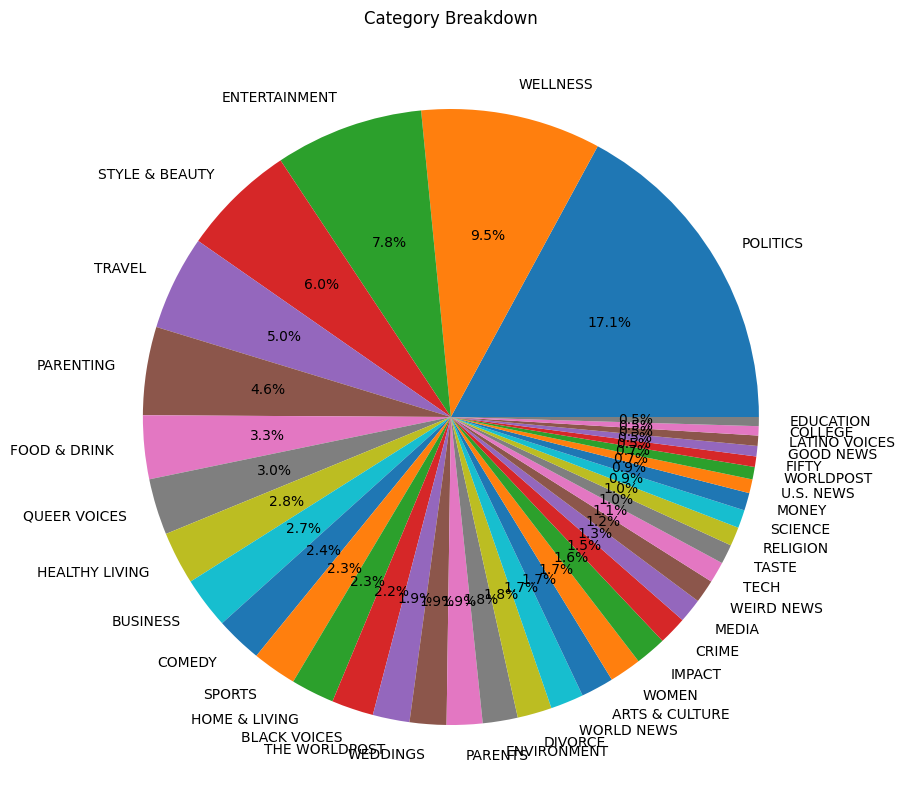

In [9]:
# Pie chart for categories
plt.figure(figsize=(12,10))
plt.pie(data['category'].value_counts(), labels=data['category'].value_counts().index, autopct='%1.1f%%')
plt.title('Category Breakdown')
plt.show()

Here we can see that Politics has the largest shar by far at 17% and most other columns just have a small sliver of the pie

# Word/Character Counts

Here we'll examine the length of each description and save that as a column for our df

In [10]:
# Create character count column
data['char_count'] = data['description'].apply(len)
data.head()

,link,category,authors,date,description,char_count
0,https://www.huffpost.com/entry/covid-boosters-...,U.S. NEWS,"Carla K. Johnson, AP",2022-09-23,"['million', 'american', 'roll', 'sleev', 'omic...",225
1,https://www.huffpost.com/entry/american-airlin...,U.S. NEWS,Mary Papenfuss,2022-09-23,"['american', 'airlin', 'flyer', 'charg', 'ban'...",201
2,https://www.huffpost.com/entry/funniest-tweets...,COMEDY,Elyse Wanshel,2022-09-23,"['funniest', 'tweet', 'cat', 'dog', 'week', 's...",106
3,https://www.huffpost.com/entry/funniest-parent...,PARENTING,Caroline Bologna,2022-09-23,"['funniest', 'tweet', 'parent', 'week', 'sept'...",207
4,https://www.huffpost.com/entry/amy-cooper-lose...,U.S. NEWS,Nina Golgowski,2022-09-22,"['woman', 'call', 'cop', 'black', 'birdwatch',...",241


In [11]:
# Create word count column
data['word_count'] = data['description'].apply(lambda x: len(x.split()))
data.head()

,link,category,authors,date,description,char_count,word_count
0,https://www.huffpost.com/entry/covid-boosters-...,U.S. NEWS,"Carla K. Johnson, AP",2022-09-23,"['million', 'american', 'roll', 'sleev', 'omic...",225,23
1,https://www.huffpost.com/entry/american-airlin...,U.S. NEWS,Mary Papenfuss,2022-09-23,"['american', 'airlin', 'flyer', 'charg', 'ban'...",201,21
2,https://www.huffpost.com/entry/funniest-tweets...,COMEDY,Elyse Wanshel,2022-09-23,"['funniest', 'tweet', 'cat', 'dog', 'week', 's...",106,12
3,https://www.huffpost.com/entry/funniest-parent...,PARENTING,Caroline Bologna,2022-09-23,"['funniest', 'tweet', 'parent', 'week', 'sept'...",207,21
4,https://www.huffpost.com/entry/amy-cooper-lose...,U.S. NEWS,Nina Golgowski,2022-09-22,"['woman', 'call', 'cop', 'black', 'birdwatch',...",241,25


In [12]:
# Create word length column
data['word_length'] = data['description'].apply(lambda x: np.mean([len(word) for word in x.split()]))
data.head()

,link,category,authors,date,description,char_count,word_count,word_length
0,https://www.huffpost.com/entry/covid-boosters-...,U.S. NEWS,"Carla K. Johnson, AP",2022-09-23,"['million', 'american', 'roll', 'sleev', 'omic...",225,23,8.826087
1,https://www.huffpost.com/entry/american-airlin...,U.S. NEWS,Mary Papenfuss,2022-09-23,"['american', 'airlin', 'flyer', 'charg', 'ban'...",201,21,8.619048
2,https://www.huffpost.com/entry/funniest-tweets...,COMEDY,Elyse Wanshel,2022-09-23,"['funniest', 'tweet', 'cat', 'dog', 'week', 's...",106,12,7.916667
3,https://www.huffpost.com/entry/funniest-parent...,PARENTING,Caroline Bologna,2022-09-23,"['funniest', 'tweet', 'parent', 'week', 'sept'...",207,21,8.904762
4,https://www.huffpost.com/entry/amy-cooper-lose...,U.S. NEWS,Nina Golgowski,2022-09-22,"['woman', 'call', 'cop', 'black', 'birdwatch',...",241,25,8.680000


In [13]:
# Examine count/length categories
data.describe()

,char_count,word_count,word_length
count,189804.000000,189804.000000,189804.000000
mean,172.501544,18.467719,8.403754
std,62.092451,6.582624,0.520619
min,15.000000,2.000000,6.444444
25%,131.000000,14.000000,8.052632
50%,167.000000,18.000000,8.375000
75%,204.000000,22.000000,8.722222
max,1321.000000,138.000000,17.750000


We can see here that the max results for character count and word count may be outliers. They are far more than even 3 standard deviations from the mean. We'll have to examine this.

Word length has a pretty small window around 8 so we probably won't be able to get too much value from this.

In [14]:
# Create function for box plot to examine outliers
def box_plot(column):
    plt.figure(figsize=(12,10))
    sns.boxplot(y=column, data=data)

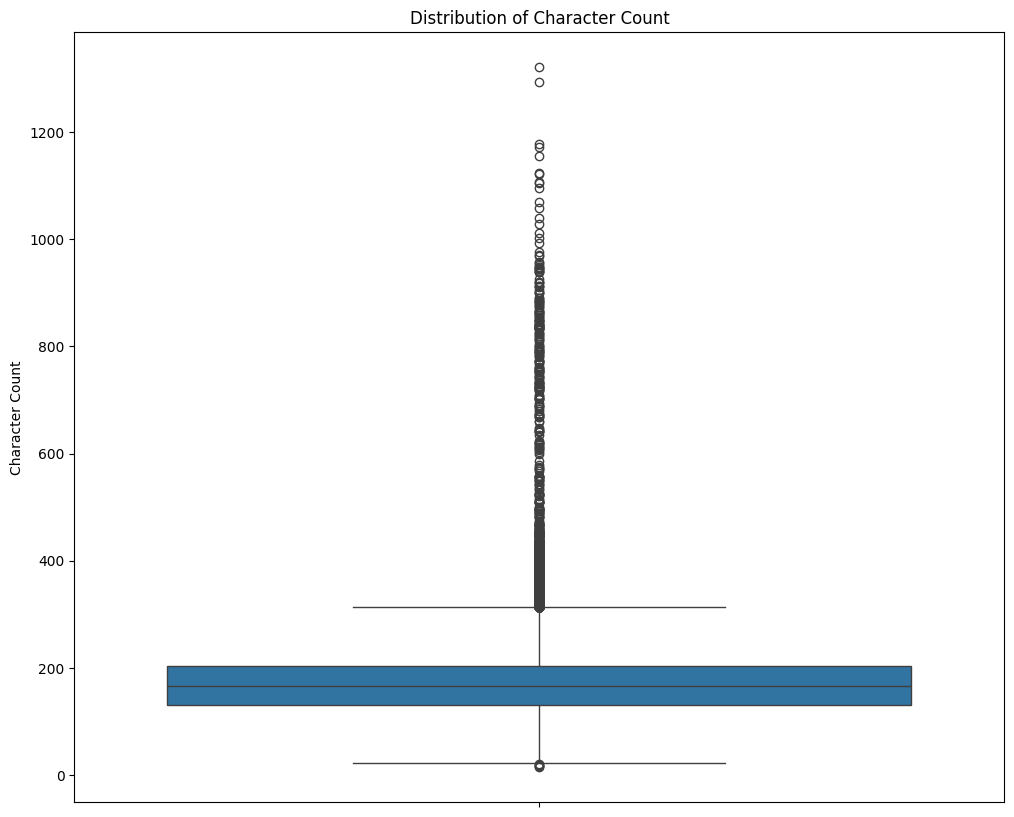

In [15]:
# Box plot of character count
box_plot('char_count')
plt.ylabel('Character Count')
plt.title('Distribution of Character Count')
plt.show()

There are a good amount of values under around 1000 characters. We can look at the values over 1000 to see if there are any abnormalities there.

In [16]:
# Examine descriptions with character counts over 1000
lg_char_count = data[data['char_count'] > 1000]

# Set option to display full column
pd.set_option('display.max_colwidth', None)

lg_char_count


,link,category,authors,date,description,char_count,word_count,word_length
60624,https://www.huffingtonpost.com/entry/sunday-roundup_457_b_11157160.html,POLITICS,"Arianna Huffington, Contributor",2016-07-24,"['sunday', 'roundup', 'week', 'nation', 'came', 'one', 'step', 'closer', 'give', 'danger', 'unstabl', 'potenti', 'leader', 'histori', 'donald', 'trump', 'humbl', 'accept', 'republican', 'presidenti', 'nomin', 'humbl', 'fact', 'went', 'claim', 'alon', 'fix', 'america', 'cap', 'week', 'nightli', 'disarray', 'trump', 'live', 'chao', 'candid', 'titl', 'given', 'jeb', 'bush', 'shone', 'endless', 'larg', 'shout', 'speech', 'fear', 'fear', 'immigr', 'fear', 'diver', 'fear', 'nation', 'america', 'becom', 'key', 'refrain', 'trump', 'promis', 'make', 'america', 'strong', 'proud', 'safe', 'never', 'mind', 'america', 'actual', 'instanc', 'safe', 'despit', 'recent', 'uptick', 'crime', 'still', 'histor', 'low', 'trump', 'builder', 'build', 'sinist', 'vision', 'lost', 'eden', 'one', 'that', 'taken', 'away', 'scari', 'danger', 'call', 'uniti', 'uniti', 'remov', 'trump', 'rebrand', 'america', 'dark', 'hostil', 'pessimist', 'fear', 'place', 'win', 'build', 'place', 'mind', 'paraphras', 'fdr', 'noth', 'fear', 'manipul', 'cynic', 'nurtur', 'fear', 'trump', 'essenc', 'short', 'america', 'that', 'bet', 'that', 'bet', 'must', 'reject', 'poll', 'mind', 'heart']",1155,126,8.174603
62413,https://www.huffingtonpost.com/entry/sunday-roundup_455_b_10787940.html,POLITICS,"Arianna Huffington, Contributor",2016-07-03,"['sunday', 'roundup', 'week', 'nation', 'remind', 'way', 'good', 'bad', 'elect', 'matter', 'monday', 'suprem', 'court', 'like', 'see', 'multipl', 'appoint', 'next', 'presid', 'deliv', 'landmark', 'decis', 'reproduct', 'right', 'tuesday', 'terrorist', 'bomb', 'istanbul', 'airport', 'leav', 'dead', 'right', 'cue', 'donald', 'trump', 'remind', 'world', 'judgment', 'stabil', 'matter', 'repeat', 'call', 'tortur', 'say', 'fight', 'fire', 'fire', 'fallout', 'brexit', 'continu', 'republican', 'offici', 'beat', 'drum', 'trexit', 'separ', 'toxic', 'menac', 'trump', 'utah', 'senat', 'mike', 'lee', 'said', 'wont', 'vote', 'trump', 'without', 'assur', 'wont', 'abus', 'constitut', 'main', 'senat', 'susan', 'collin', 'hint', 'might', 'vote', 'hillari', 'clinton', 'mitt', 'romney', 'said', 'hed', 'vote', 'wife', 'trump', 'meanwhil', 'illinoi', 'senat', 'mark', 'kirk', 'becam', 'first', 'gop', 'incumb', 'air', 'antitrump', 'list', 'trexit', 'elect', 'offici', 'grow', 'nevertrump', 'rnc', 'effort', 'insert', 'conscienc', 'claus', 'allow', 'deleg', 'vote', 'candid', 'violat', 'moral', 'belief', 'convent', 'near', 'find', 'whose', 'conscienc', 'put', 'countri', 'parti', 'whose']",1177,126,8.349206
64817,https://www.huffingtonpost.com/entry/sunday-roundup_451_b_10299484.html,POLITICS,"Arianna Huffington, Contributor",2016-06-05,"['sunday', 'roundup', 'week', 'nation', 'look', 'horrifi', 'silverback', 'gorilla', 'threaten', 'captiv', 'look', 'unabl', 'escap', 'talk', 'cours', 'donald', 'trump', 'turn', 'everi', 'bit', 'danger', 'unstabl', 'predict', 'continu', 'attack', 'judg', 'trump', 'univers', 'lawsuit', 'judg', 'unseal', 'document', 'show', 'staffer', 'encourag', 'prey', 'vulner', 'realli', 'fraud', 'said', 'new', 'york', 'attorney', 'gener', 'eric', 'schneiderman', 'begin', 'end', 'way', 'true', 'reflect', 'namesak', 'perhap', 'seal', 'deal', 'speaker', 'paul', 'ryan', 'hesit', 'endors', 'trump', 'show', 'principl', 'worth', 'much', 'trump', 'you', 'real', 'estat', 'class', 'rise', 'occas', 'michigan', 'governor', 'rick', 'snyder', 'declin', 'endors', 'trump', 'former', 'cia', 'nsa', 'chief', 'michael', 'hayden', 'describ', 'trump', 'rhetor', 'feed', 'isis', 'recruit', 'video', 'dont', 'geniu', 'see', 'trump', 'doesnt', 'hurt', 'demagogu', 'seem', 'appeal', 'lowest', 'common', 'denomin', 'said', 'stephen', 'hawk', 'noth', 'theoret']",1028,109,8.440367
65384,https://www.huffingtonpost.com/entry/sunday-roundup_450_b_10186270.html,POLITICS,"Arianna Huffington,

It seems that mose of these are weekend or week round ups where they are touching on a lot of info/topics. When exploring the links these all look like valid descriptions.

Now we'll examine word count in a similar way.

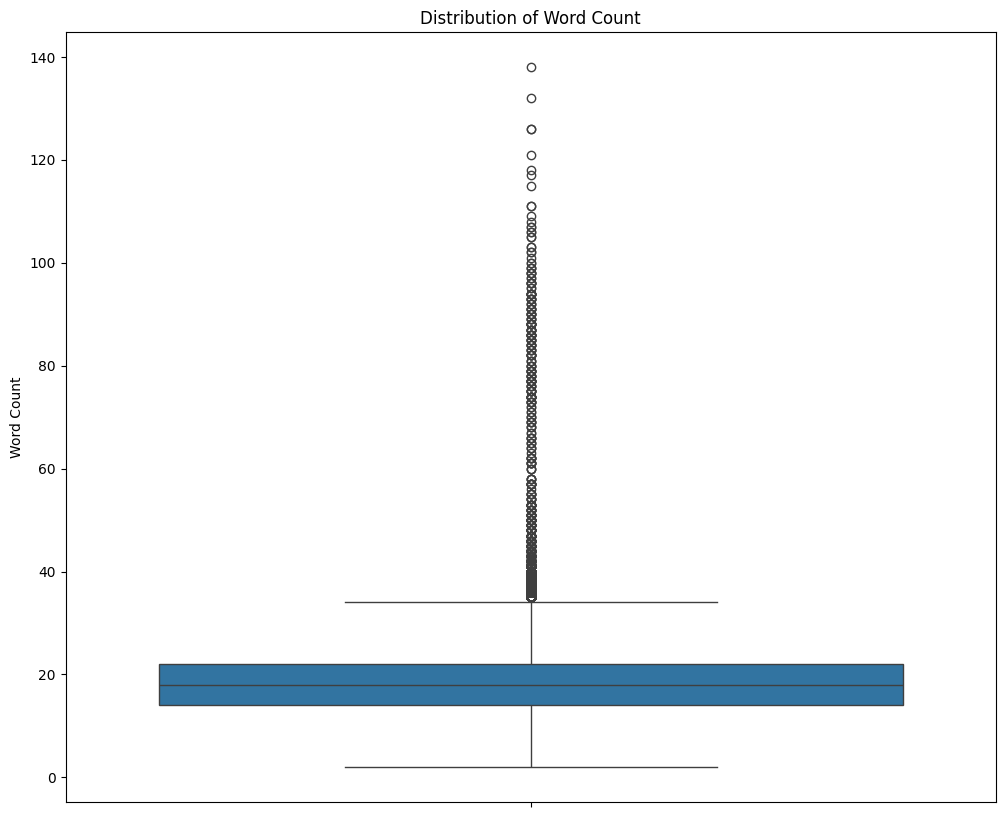

In [17]:
# Box plot of word count
box_plot('word_count')
plt.ylabel('Word Count')
plt.title('Distribution of Word Count')
plt.show()

Here the data seems to get more sparse around the 115 word count range. We'll examine those values

In [18]:
# Subset of rows with > 115 words
lg_word_count = data[data['word_count'] > 115]

lg_word_count

,link,category,authors,date,description,char_count,word_count,word_length
60624,https://www.huffingtonpost.com/entry/sunday-roundup_457_b_11157160.html,POLITICS,"Arianna Huffington, Contributor",2016-07-24,"['sunday', 'roundup', 'week', 'nation', 'came', 'one', 'step', 'closer', 'give', 'danger', 'unstabl', 'potenti', 'leader', 'histori', 'donald', 'trump', 'humbl', 'accept', 'republican', 'presidenti', 'nomin', 'humbl', 'fact', 'went', 'claim', 'alon', 'fix', 'america', 'cap', 'week', 'nightli', 'disarray', 'trump', 'live', 'chao', 'candid', 'titl', 'given', 'jeb', 'bush', 'shone', 'endless', 'larg', 'shout', 'speech', 'fear', 'fear', 'immigr', 'fear', 'diver', 'fear', 'nation', 'america', 'becom', 'key', 'refrain', 'trump', 'promis', 'make', 'america', 'strong', 'proud', 'safe', 'never', 'mind', 'america', 'actual', 'instanc', 'safe', 'despit', 'recent', 'uptick', 'crime', 'still', 'histor', 'low', 'trump', 'builder', 'build', 'sinist', 'vision', 'lost', 'eden', 'one', 'that', 'taken', 'away', 'scari', 'danger', 'call', 'uniti', 'uniti', 'remov', 'trump', 'rebrand', 'america', 'dark', 'hostil', 'pessimist', 'fear', 'place', 'win', 'build', 'place', 'mind', 'paraphras', 'fdr', 'noth', 'fear', 'manipul', 'cynic', 'nurtur', 'fear', 'trump', 'essenc', 'short', 'america', 'that', 'bet', 'that', 'bet', 'must', 'reject', 'poll', 'mind', 'heart']",1155,126,8.174603
62413,https://www.huffingtonpost.com/entry/sunday-roundup_455_b_10787940.html,POLITICS,"Arianna Huffington, Contributor",2016-07-03,"['sunday', 'roundup', 'week', 'nation', 'remind', 'way', 'good', 'bad', 'elect', 'matter', 'monday', 'suprem', 'court', 'like', 'see', 'multipl', 'appoint', 'next', 'presid', 'deliv', 'landmark', 'decis', 'reproduct', 'right', 'tuesday', 'terrorist', 'bomb', 'istanbul', 'airport', 'leav', 'dead', 'right', 'cue', 'donald', 'trump', 'remind', 'world', 'judgment', 'stabil', 'matter', 'repeat', 'call', 'tortur', 'say', 'fight', 'fire', 'fire', 'fallout', 'brexit', 'continu', 'republican', 'offici', 'beat', 'drum', 'trexit', 'separ', 'toxic', 'menac', 'trump', 'utah', 'senat', 'mike', 'lee', 'said', 'wont', 'vote', 'trump', 'without', 'assur', 'wont', 'abus', 'constitut', 'main', 'senat', 'susan', 'collin', 'hint', 'might', 'vote', 'hillari', 'clinton', 'mitt', 'romney', 'said', 'hed', 'vote', 'wife', 'trump', 'meanwhil', 'illinoi', 'senat', 'mark', 'kirk', 'becam', 'first', 'gop', 'incumb', 'air', 'antitrump', 'list', 'trexit', 'elect', 'offici', 'grow', 'nevertrump', 'rnc', 'effort', 'insert', 'conscienc', 'claus', 'allow', 'deleg', 'vote', 'candid', 'violat', 'moral', 'belief', 'convent', 'near', 'find', 'whose', 'conscienc', 'put', 'countri', 'parti', 'whose']",1177,126,8.349206
65977,https://www.huffingtonpost.com/entry/sunday-roundup_449_b_10085936.html,POLITICS,"Arianna Huffington, Contributor",2016-05-22,"['sunday', 'roundup', 'week', 'nation', 'watch', 'nevertrump', 'movement', 'fold', 'faster', 'one', 'presumpt', 'nomine', 'beachfront', 'develop', 'mani', 'tri', 'explain', 'away', 'trump', 'reckless', 'racist', 'extrem', 'put', 'principl', 'parti', 'wife', 'former', 'republican', 'senat', 'bob', 'bennett', 'die', 'may', 'reveal', 'husband', 'spent', 'die', 'hour', 'reach', 'muslim', 'would', 'peopl', 'hijab', 'tell', 'glad', 'america', 'told', 'daili', 'beast', 'want', 'apolog', 'behalf', 'republican', 'parti', 'prime', 'minist', 'david', 'cameron', 'call', 'trump', 'propos', 'ban', 'muslim', 'enter', 'divis', 'stupid', 'wrong', 'trump', 'repli', 'didnt', 'think', 'cameron', 'would', 'good', 'relationship', 'press', 'also', 'part', 'whitewash', 'extrem', 'new', 'york', 'time', 'call', 'trump', 'racism', 'reduct', 'approach', 'ethnic', 'said', 'trump', 'attitud', 'toward', 'woman', 'complex', 'defi', 'simpl', 'categor', 'sexism', 'suddenli', 'complic', 'string', 'theori', 'everybodi', 'along', 'bob', 'garfield', 'cohost', 'medium', 'warn', 'press', 'danger', 'normal', 'trump', 'everi', 'interview', 'donald', 'trump', 'everi', 'singl', 'o

These are all in the columns that were in our large character count subset (as could be expected). I inspected these before and they all seem legitimate so we don't need to do anything about these.

## Counts by Category

Now that we created the necessary columns, I'll examine these counts by category. First we'll look at character count by category

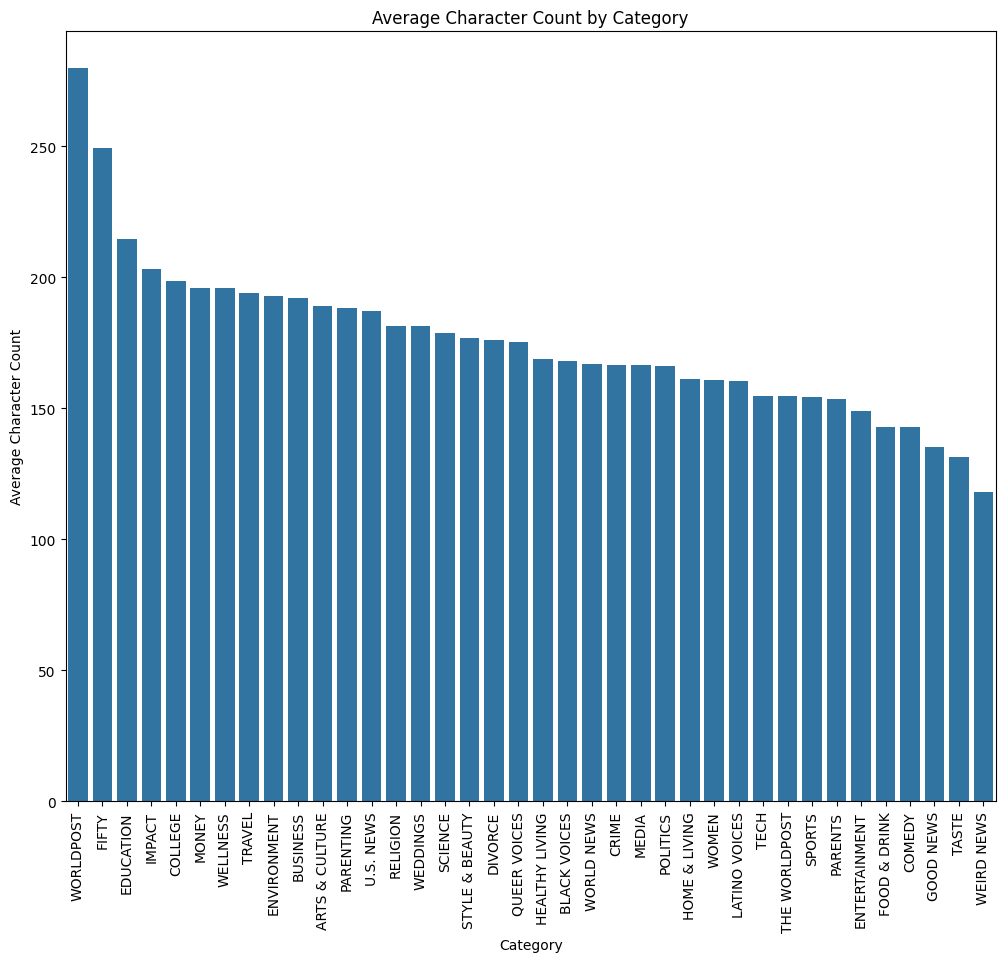

In [19]:
# Average character count by category
char_mean = data.groupby('category')['char_count'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,10))
sns.barplot(x=char_mean.index, y=char_mean.values)
plt.xlabel('Category')
plt.ylabel('Average Character Count')
plt.xticks(rotation=90)
plt.title('Average Character Count by Category')
plt.show()

In [20]:
char_mean

,char_count
category,
WORLDPOST,279.871176
FIFTY,249.258157
EDUCATION,214.481153
IMPACT,203.254699
COLLEGE,198.624321
MONEY,196.000000
WELLNESS,195.881327
TRAVEL,194.031631
ENVIRONMENT,192.863780


Most categories are between 150-210 characters while World Post and Fifty are the leaders at 280 and 249 average characters respectively.

I'll also examine the distribution of character counts in a box plot.

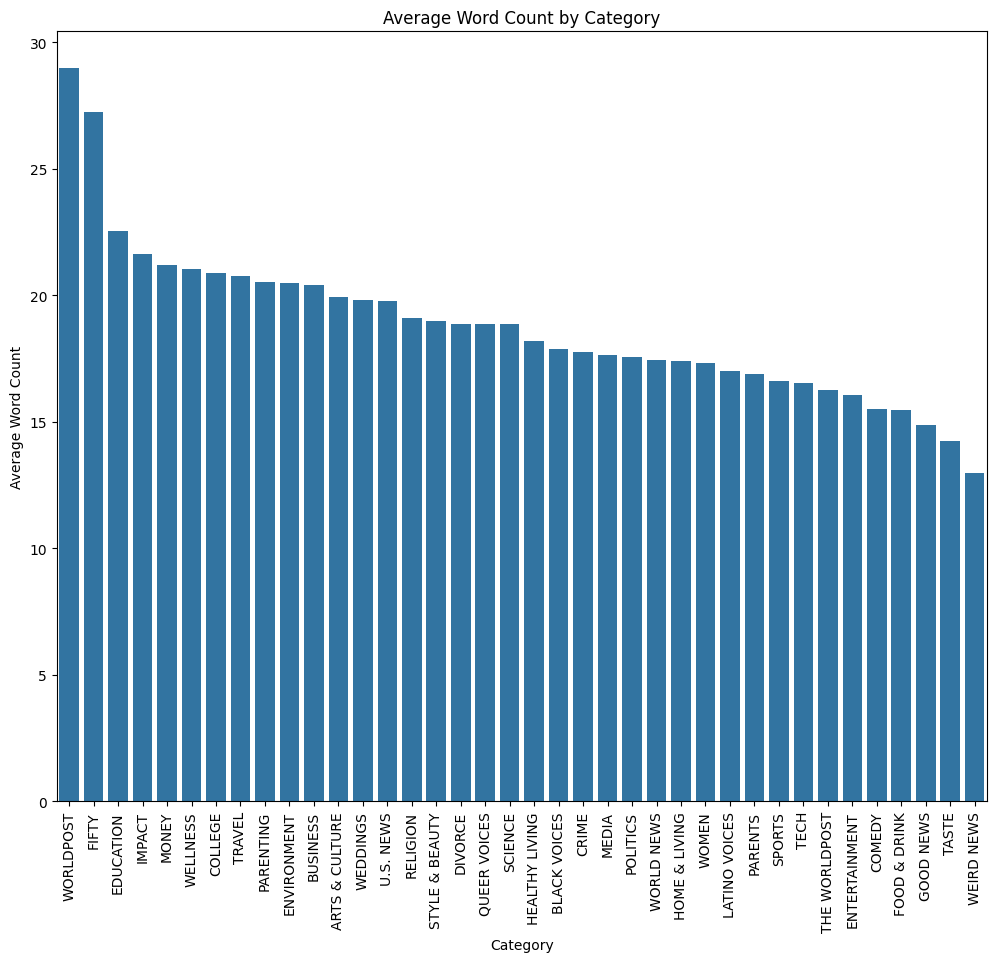

In [21]:
# Average word count by category
word_mean = data.groupby('category')['word_count'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,10))
sns.barplot(x=word_mean.index, y=word_mean.values)
plt.xlabel('Category')
plt.ylabel('Average Word Count')
plt.xticks(rotation=90)
plt.title('Average Word Count by Category')
plt.show()

In [22]:
word_mean

,word_count
category,
WORLDPOST,28.982287
FIFTY,27.264875
EDUCATION,22.548780
IMPACT,21.637719
MONEY,21.187464
WELLNESS,21.028205
COLLEGE,20.900109
TRAVEL,20.766267
PARENTING,20.543003


We can see most columns fall between 15-24 words per description with WorldPost and Fifty leading with 29 and 27 words per post respectively. More light topics crowd the bottom of this like food, weird news, good news, comedy, and entertainment.

It is interesting that the two highest word counts are WorldPost and Fifty. These could be targeting certain foreign and older demographics.

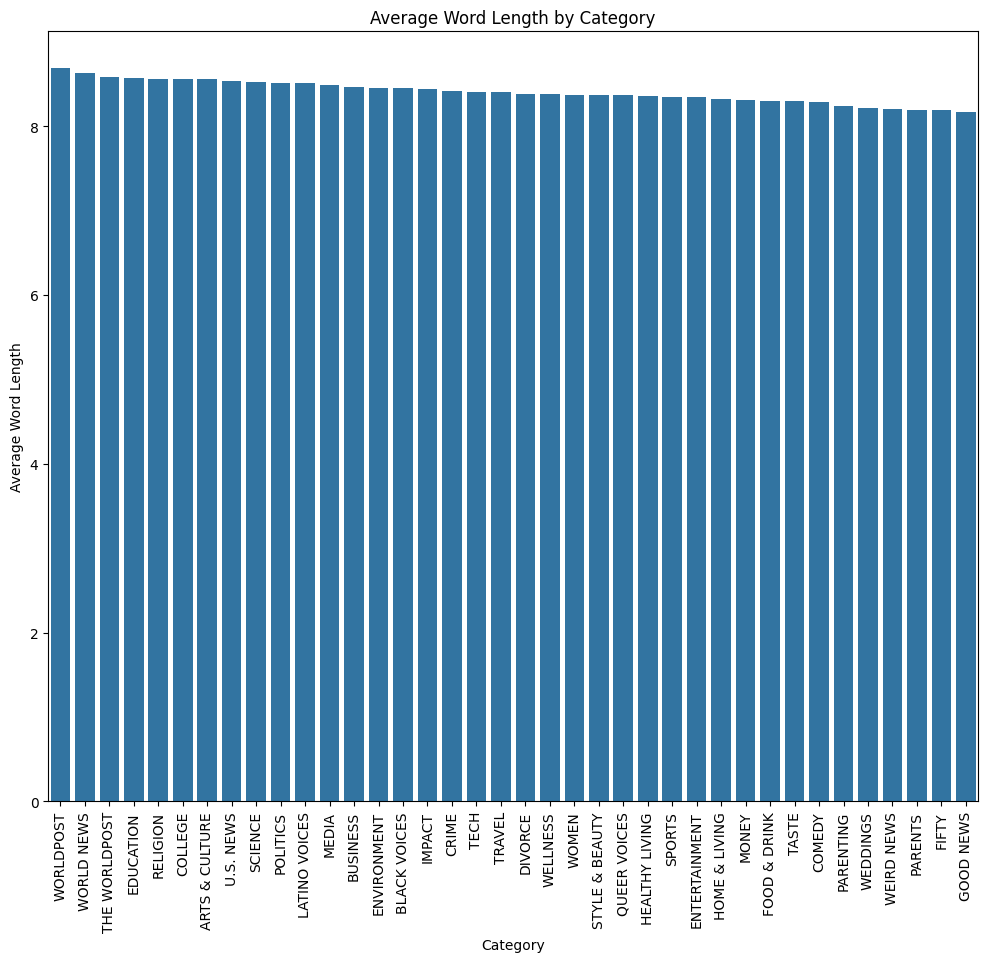

In [23]:
# Plot word length by category
word_length_mean = data.groupby('category')['word_length'].mean().sort_values(ascending=False)

plt.figure(figsize=(12,10))
sns.barplot(x=word_length_mean.index, y=word_length_mean.values)
plt.xlabel('Category')
plt.ylabel('Average Word Length')
plt.xticks(rotation=90)
plt.title('Average Word Length by Category')
plt.show()

In [24]:
word_length_mean

,word_length
category,
WORLDPOST,8.688799
WORLD NEWS,8.630165
THE WORLDPOST,8.586883
EDUCATION,8.573653
RELIGION,8.565414
COLLEGE,8.565056
ARTS & CULTURE,8.563743
U.S. NEWS,8.530684
SCIENCE,8.521250


These seem pretty similar across the board showing no real correlation as they are all within 1 letter length per word.

# Term Frequncy Analysis

Here we will look at what words are occuring the most in our descriptions.

In [25]:
# Find most frequently occuring words
most_freq = pd.Series(' '.join(data['description']).split()).value_counts()[:25]
most_freq

,count
"'new',",16742
"'trump',",16381
"'one',",15231
"'photo',",13604
"'get',",13155
"'make',",13097
"'like',",12522
"'say',",12187
"'day',",12145
"'eye',",12012


We can see here that 'new' is the top occuring word in our data set, probably also stemming from 'news'. 'trump' is the second highest occuring which makes sense as politics was the biggest category and the data spans from 2012-2022 where Trump was in the news cycle very frequently.

I'll plot this data to depict this visually

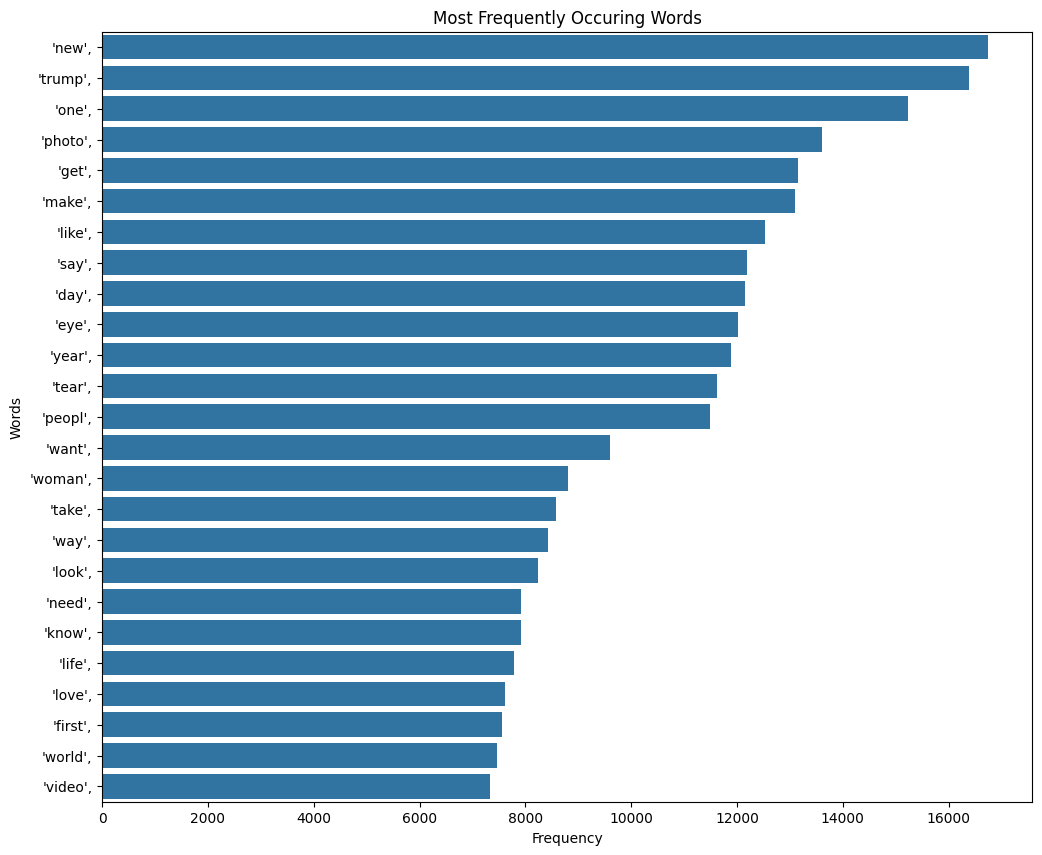

In [26]:
# Create words and frequency subsets to plot data
words = most_freq.index
freq = most_freq.values

# Plot data
plt.figure(figsize=(12,10))
sns.barplot(x=freq, y=words)
plt.xlabel('Frequency')
plt.ylabel('Words')
plt.title('Most Frequently Occuring Words')
plt.show()

Now we'll examine the most frequent words by category

In [27]:
# Create set of most frequent words by category
cat_most_freq = data.groupby('category')['description'].apply(lambda x: pd.Series(' '.join(x).split()).value_counts()[:1])
cat_most_freq.head(10)

,,description
category,,
ARTS & CULTURE,"'art',",754
BLACK VOICES,"'black',",1385
BUSINESS,"'busi',",716
COLLEGE,"'colleg',",423
COMEDY,"'trump',",1215
CRIME,"'polic',",659
DIVORCE,"'divorc',",2505
EDUCATION,"'school',",434
ENTERTAINMENT,"'new',",1747


Let's plot this to see it visually

In [28]:
# Separate word from index
cat_most_freq = cat_most_freq.reset_index()
cat_most_freq.head()

,category,level_1,description
0,ARTS & CULTURE,"'art',",754
1,BLACK VOICES,"'black',",1385
2,BUSINESS,"'busi',",716
3,COLLEGE,"'colleg',",423
4,COMEDY,"'trump',",1215


In [29]:
# Rename word/count columns
cat_most_freq.rename(columns={'level_1': 'word'}, inplace=True)
cat_most_freq.rename(columns={'description': 'count'}, inplace=True)
cat_most_freq.head()

,category,word,count
0,ARTS & CULTURE,"'art',",754
1,BLACK VOICES,"'black',",1385
2,BUSINESS,"'busi',",716
3,COLLEGE,"'colleg',",423
4,COMEDY,"'trump',",1215


We'll sort the values for better visual appeal

In [30]:
# Sort by frequency
cat_most_freq = cat_most_freq.sort_values(by='count', ascending=False)

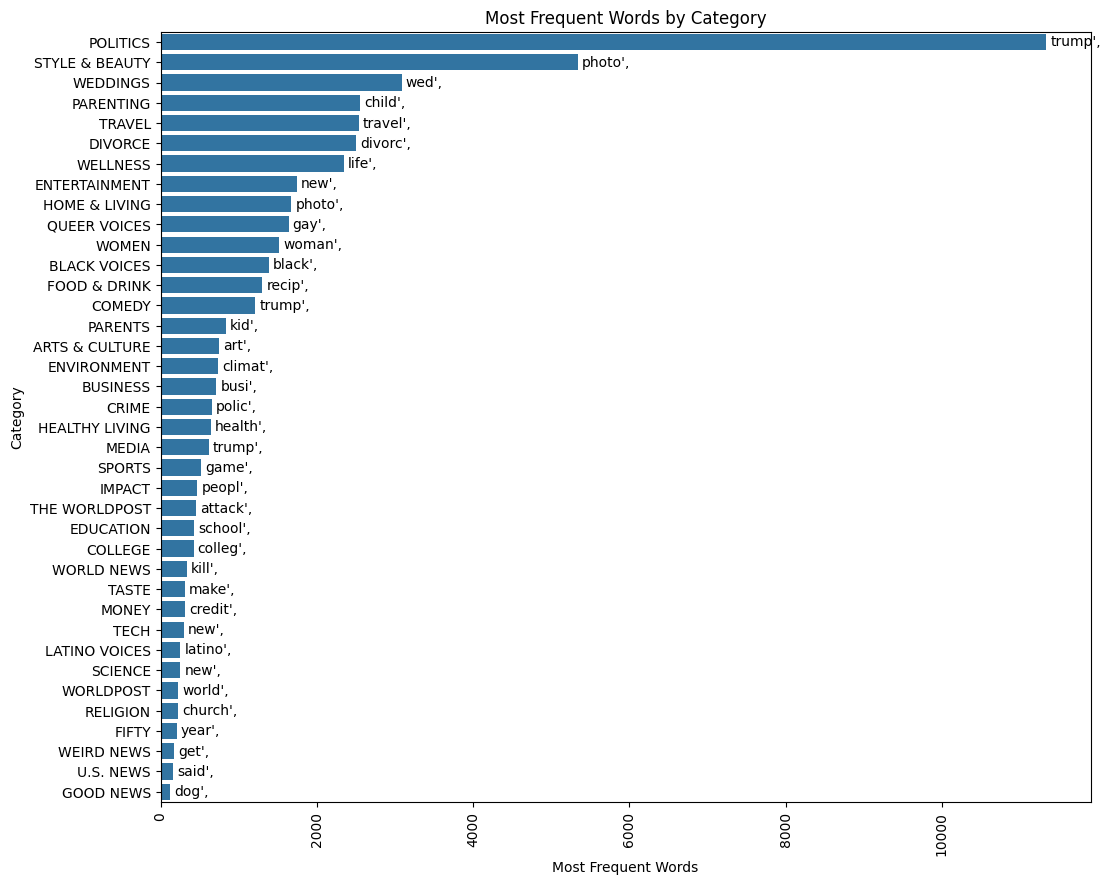

In [31]:
# Plot category most freq words
fig, ax = plt.subplots(figsize=(12,10))
sns.barplot(x='count', y='category', data=cat_most_freq)
# Extract the word from the string representation of the list
ax.bar_label(ax.containers[0], labels=[word.strip("['']") for word in cat_most_freq.word], padding=3)
plt.xlabel('Most Frequent Words')
plt.ylabel('Category')
plt.xticks(rotation=90)
plt.title('Most Frequent Words by Category')
plt.show()

We can see that 'trump' is very frequently occuring in the politics category. Of just over 32000 politics articles, it appears over 11000 times. Trump also leads in comedy and media categories. New also had 3 categories where it was the most frequent word in Science, Tech, and Entertainment.

We can also look at the percentage of total word count each word is taking up to give us a better sense of how frequent each category is using each word

In [32]:
# Get sum of word count for each category
word_count_sum = data.groupby('category')['word_count'].sum()
word_count_sum

,word_count
category,
ARTS & CULTURE,65040
BLACK VOICES,74722
BUSINESS,104702
COLLEGE,19249
COMEDY,72036
CRIME,50352
DIVORCE,64690
EDUCATION,20339
ENTERTAINMENT,237292


In [33]:
# Join with most_freq df and get percentage
cat_most_freq = cat_most_freq.merge(word_count_sum, on='category')
cat_most_freq['percentage'] = (cat_most_freq['count'] / cat_most_freq['word_count'] * 100).round(2)
cat_most_freq

,category,word,count,word_count,percentage
0,POLITICS,"'trump',",11337,570085,1.99
1,STYLE & BEAUTY,"'photo',",5340,215809,2.47
2,WEDDINGS,"'wed',",3085,72371,4.26
3,PARENTING,"'child',",2553,180573,1.41
4,TRAVEL,"'travel',",2539,195639,1.30
5,DIVORCE,"'divorc',",2505,64690,3.87
6,WELLNESS,"'life',",2345,377246,0.62
7,ENTERTAINMENT,"'new',",1747,237292,0.74
8,HOME & LIVING,"'photo',",1674,75235,2.23
9,QUEER VOICES,"'gay',",1639,105688,1.55


In [34]:
# Sort by percentage
cat_most_freq = cat_most_freq.sort_values(by='percentage', ascending=False)

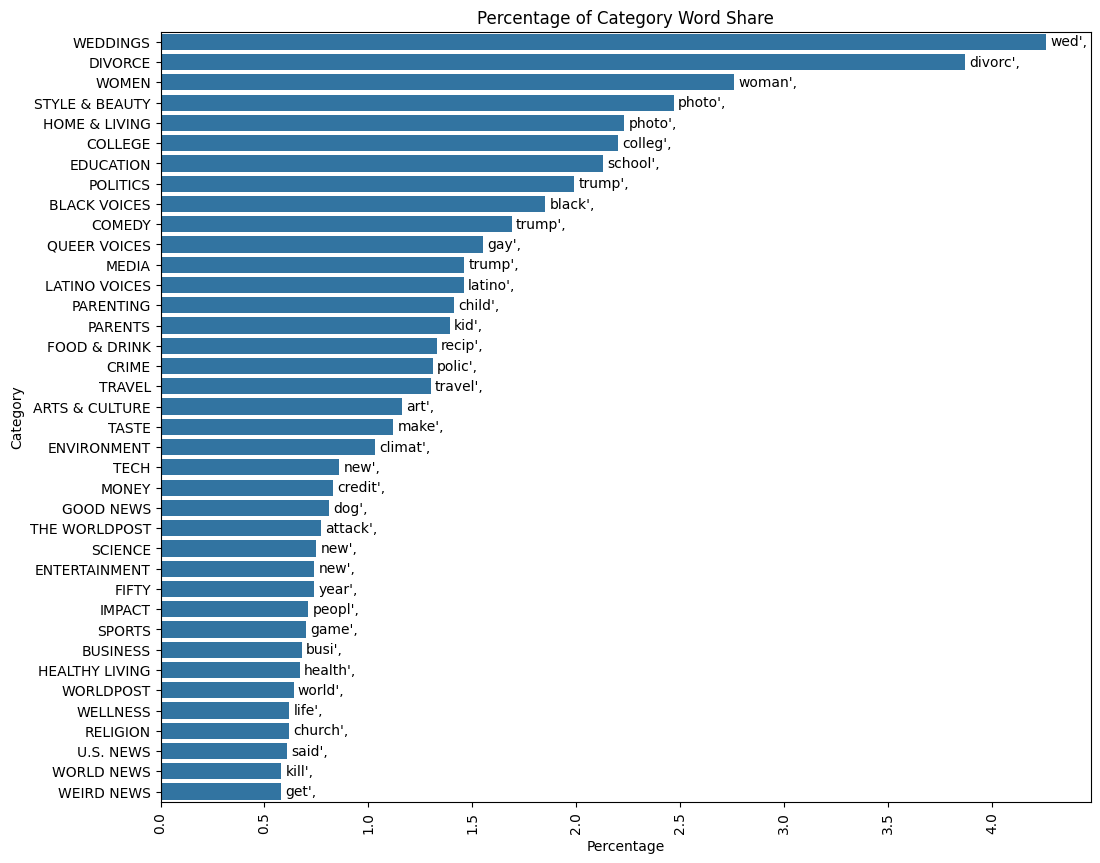

In [35]:
# Plot in bar plot
fig, ax = plt.subplots(figsize=(12,10))
sns.barplot(x='percentage', y='category', data=cat_most_freq)
plt.xlabel('Percentage')
plt.ylabel('Category')
ax.bar_label(ax.containers[0], labels=[word.strip("['']") for word in cat_most_freq.word], padding=3)
plt.xticks(rotation=90)
plt.title('Percentage of Category Word Share')
plt.show()

All words have less than a 5% of total word share in the categories. While Trump had the largest count in a category by far, we can see here it's actually more toward the middle in the percentage share.

Photo took up a sizable share in two categories, Style & Beauty and Home living. A lot of the leading share words are related to category titles which makes sense

# N-grams

We'll examine both bi-grams and tri-grams to analyze the most frequent 2 and 3 word phrases in our set

In [46]:
# Create new df to convert description into string
data_string = data[['category', 'description']]
data_string.head()

,category,description
0,U.S. NEWS,"['million', 'american', 'roll', 'sleev', 'omicrontarget', 'covid', 'booster', 'health', 'expert', 'said', 'earli', 'predict', 'whether', 'demand', 'would', 'match', '171', 'million', 'dose', 'new', 'booster', 'order', 'fall']"
1,U.S. NEWS,"['american', 'airlin', 'flyer', 'charg', 'ban', 'life', 'punch', 'flight', 'attend', 'video', 'subdu', 'passeng', 'crew', 'fled', 'back', 'aircraft', 'confront', 'accord', 'attorney', 'offic', 'angel']"
2,COMEDY,"['funniest', 'tweet', 'cat', 'dog', 'week', 'sept', '1723', 'dog', 'dont', 'understand', 'could', 'eaten']"
3,PARENTING,"['funniest', 'tweet', 'parent', 'week', 'sept', '1723', 'accident', 'put', 'grownup', 'toothpast', 'toddler', 'toothbrush', 'scream', 'like', 'clean', 'teeth', 'carolina', 'reaper', 'dip', 'tabasco', 'sauc']"
4,U.S. NEWS,"['woman', 'call', 'cop', 'black', 'birdwatch', 'lose', 'lawsuit', 'exemploy', 'ami', 'cooper', 'accus', 'invest', 'firm', 'franklin', 'templeton', 'unfairli', 'fire', 'brand', 'racist', 'video', 'central', 'park', 'encount', 'went', 'viral']"


In [47]:
# Convert back into continuous sentence format
data_string.loc[:, 'description'] = data_string['description'].apply(lambda x: " ".join(x.strip("['']").replace("', '", " ").split()))
data_string.head()

,category,description
0,U.S. NEWS,million american roll sleev omicrontarget covid booster health expert said earli predict whether demand would match 171 million dose new booster order fall
1,U.S. NEWS,american airlin flyer charg ban life punch flight attend video subdu passeng crew fled back aircraft confront accord attorney offic angel
2,COMEDY,funniest tweet cat dog week sept 1723 dog dont understand could eaten
3,PARENTING,funniest tweet parent week sept 1723 accident put grownup toothpast toddler toothbrush scream like clean teeth carolina reaper dip tabasco sauc
4,U.S. NEWS,woman call cop black birdwatch lose lawsuit exemploy ami cooper accus invest firm franklin templeton unfairli fire brand racist video central park encount went viral


Now that we have the data back into a continuous format, we can analyze bi-grams and tri-grams. We'll start with bi-grams

In [51]:
# Import/download packages
import nltk
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [60]:
# Generate and count bigrams from description
tokens = word_tokenize(data_string['description'].str.cat(sep=' '))

# Create bigrams
from nltk.util import bigrams
nltk_bigrams = list(bigrams(tokens))

# Count the bigrams
from collections import Counter
bigram_counts = Counter(nltk_bigrams)

# Convert to Series for easier viewing
bigrams_series = pd.Series(bigram_counts).sort_values(ascending=False)
bigrams_series.head()

,,0
tear,eye,11585
donald,trump,6605
new,york,3139
hillari,clinton,1914
white,hous,1700


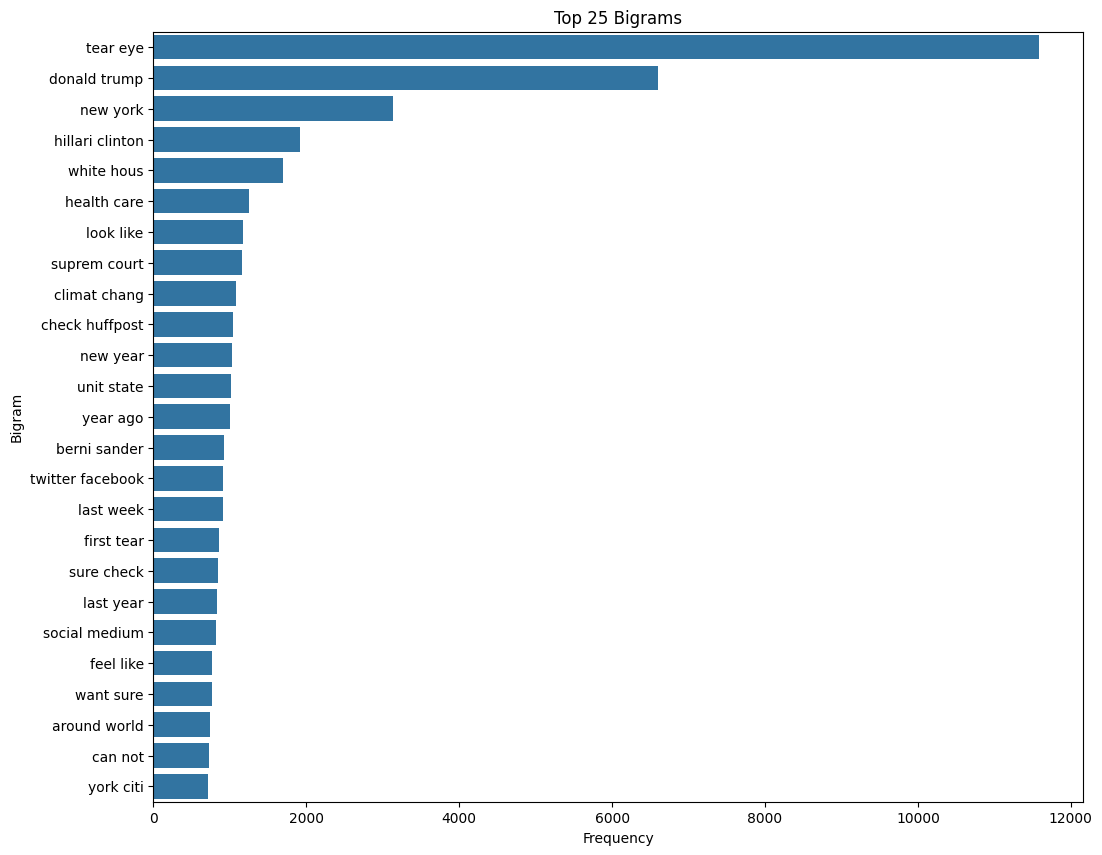

In [61]:
# Separate into top 25 bigrams and plot
top_25_bigrams = bigrams_series[:25]

# Convert the bigram tuples to strings for plotting
bigram_labels = [' '.join(bigram) for bigram in top_25_bigrams.index]

plt.figure(figsize=(12,10))
sns.barplot(x=top_25_bigrams.values, y=bigram_labels)
plt.ylabel('Bigram')
plt.xlabel('Frequency')
plt.title('Top 25 Bigrams')
plt.show()

We can see that tear eye is the most common bigram by a wide margin, coming from the root teary eyed. This is interesting it exceeded other bigrams by so much. Most of the other top results are significant political people (Trump, Hillary Clinton, Bernie Sanders) or locations.

Now we'll do the same for trigrams

In [62]:
# Create trigrams
from nltk.util import trigrams
nltk_trigrams = list(trigrams(tokens))

# Count the bigrams
trigram_counts = Counter(nltk_trigrams)

# Convert to Series for easier viewing
trigrams_series = pd.Series(trigram_counts).sort_values(ascending=False)
trigrams_series.head()

,,,0
first,tear,eye,863
want,sure,check,747
new,york,citi,708
twitter,facebook,tumblr,677
facebook,tumblr,pinterest,642


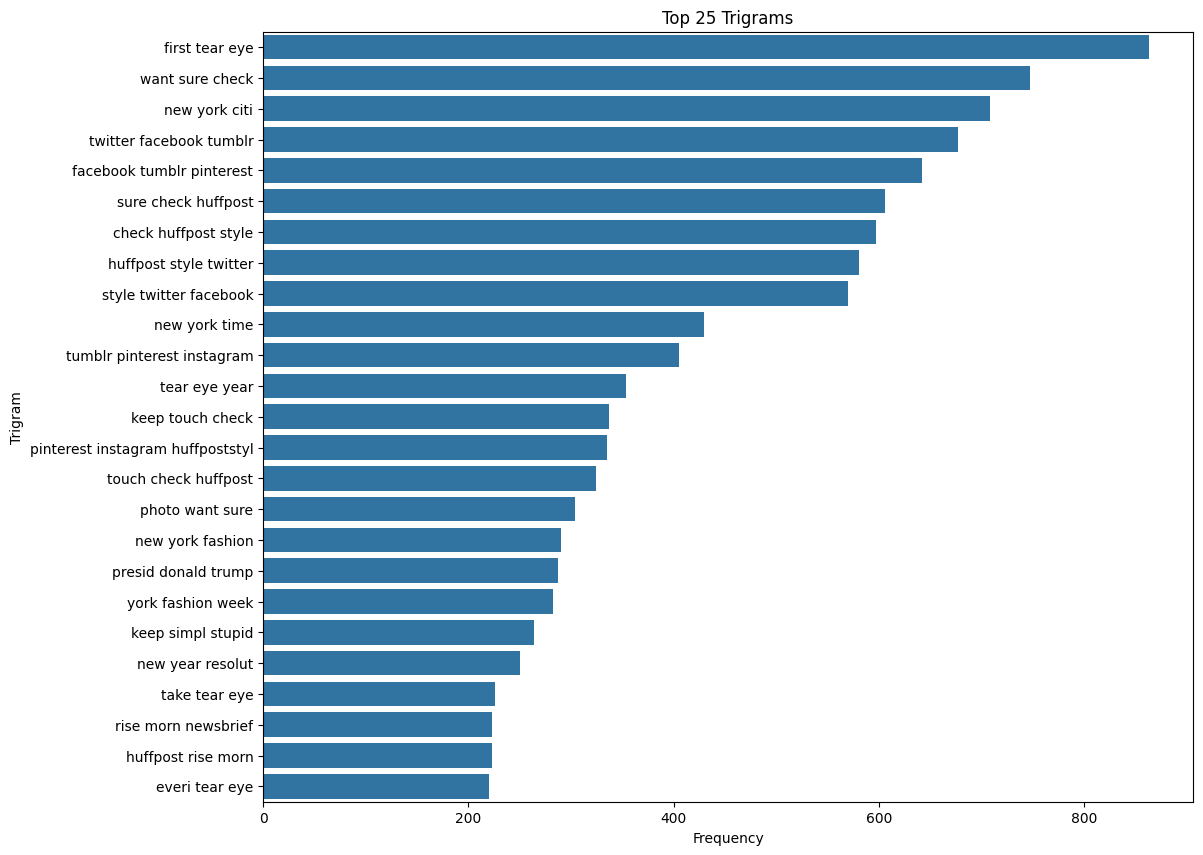

In [63]:
# Separate into top 25 trigrams and plot
top_25_trigrams = trigrams_series[:25]

# Convert the trigram tuples to strings for plotting
trigram_labels = [' '.join(trigram) for trigram in top_25_trigrams.index]

plt.figure(figsize=(12,10))
sns.barplot(x=top_25_trigrams.values, y=trigram_labels)
plt.ylabel('Trigram')
plt.xlabel('Frequency')
plt.title('Top 25 Trigrams')
plt.show()

Here we can see the frequncy for our top results are much more evenly distributed in frequency. First tear eye is the top result followed by want sure check. Our top bigram, tear eye appears in 4 of the top 25 results.

We do see a lot fo trigrams includings social media sites like twitter, facebook, tumbler, pinterest, and instagram. These probably stem from ads within the short descriptions.